In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), '3_ia'))
except:
	pass

 # Algoritmo de IA – Regressão Linear
 ### Noel Viscome Eliezer

In [2]:
import pandas as pd
import numpy as np

 O dataset é um conjunto imenso de dados oceanográficos coletados ao redor do mundo e ao longo do tempo.
 Nessa análise, iremos apenas buscar uma relação entre a temperatura da água e a salinidade.
 Como o dataset inteiro consiste de mais de 800.000 entradas, iremos usar uma amostra de 20.000 entradas para facilitar o processamento e a visualização.

In [3]:
full_bottle = pd.read_csv('bottle.csv')
bottle = full_bottle.sample(20000)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 Primeiramente, separamos as colunas que interessam para a análise, que são a temperatura e a salinidade. A temperatura será tratada como _feature_, e a salinidade como _target_.

In [4]:
temp = bottle.loc[:, ['T_degC']]
salt = bottle.loc[:, ['Salnty']] 

 Precisamos lidar com os dados faltantes para realizar a regressão. Neste caso, vamos preencher os dados faltantes com a média da amostra.

In [5]:
temp = temp.fillna(temp.mean())
salt = salt.fillna(salt.mean())

 Dividimos a amostra entre um grupo de treino (70% da amostra), que será usado para o treino (_fitting_) do algoritmo, e um grupo de teste (30% da amostra), que será usado para fins de análise do erro do modelo.

In [6]:
from sklearn.model_selection import train_test_split
temp_train, temp_test, salt_train, salt_test = train_test_split(temp, salt, test_size = 0.3)

 Agora efetivamente criamos e treinamos o regressor com as amostras de treino.

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(temp_train, salt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 Agora que temos nosso regressor treinado, vamos visualizar os dados em um _scatter plot_:
 Os pontos em azul são os pontos reais, usados pra treinar o regressor; os pontos em verde representam os pontos estimados pelo regressor já treinado.
 Um detalhe a ser percebido é que os pontos em azul que formam uma reta horizontal perfeita logo abaixo de 34 representam (geralmente) os pontos que foram preenchidos com a média anteriormente.

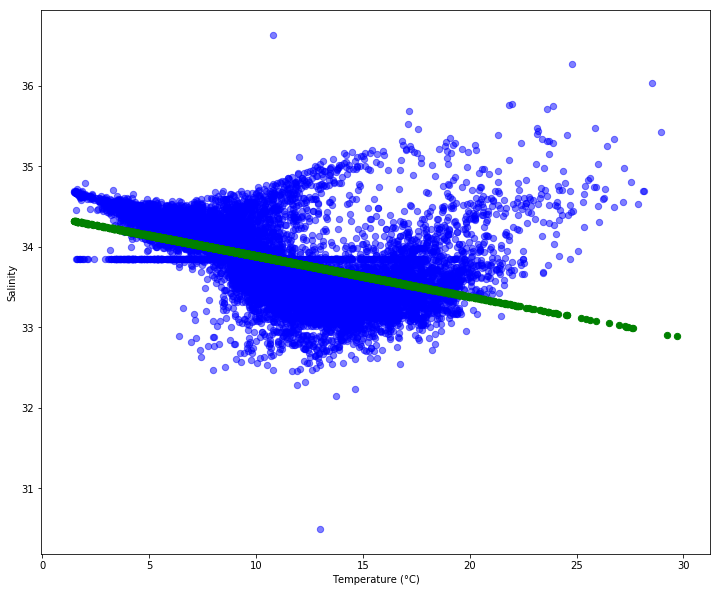

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(x = temp_train, y = salt_train, c = 'b', s=40, alpha = 0.5)
plt.scatter(x = temp_test, y = regressor.predict(temp_test), c = 'g', s = 40)
plt.ylabel("Salinity")
plt.xlabel("Temperature (°C)")
plt.show()

 Calculamos também o score r<sup>2</sup> para analisar a variância do modelo em relação ao dataset.

In [9]:
regressor.score(temp_test, salt_test)

0.23396666797614674

 O valor de cerca de aproximadamente 25% (sendo 100% o melhor valor possível, indicando perfeita paridade entre o modelo e os dados) de r<sup>2</sup> é um indicador da grande variância dos dados utilizados para a definição do regressor.


 Finalmente, utilizamos validação cruzada para determinar o erro quadrado médio negativo entre uma série de 5 validações com a amostra original.

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, temp, salt, cv=5, scoring='neg_mean_squared_error')
print(scores)


[-0.1603221  -0.15613664 -0.14578683 -0.1522189  -0.1507589 ]


 A partir das informações obtidas, obtemos também o coeficiente angular da reta e seu ponto de intersecção:

In [11]:
print(f'Coeficiente angular = {float(regressor.coef_):.2f}')
print(f'Intersecção = {float(regressor.intercept_):.2f}')


Coeficiente angular = -0.05
Intersecção = 34.40


 Finalmente, a conclusão principal da análise é: embora estejam relacionados, a salinidade da água e a temperatura da água são significativamente afetadas também por outros fatores. A enorme variância observada é o principal indicador disso.